In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score

In [38]:
data = pd.read_csv('abalone.data')
data.head()

,sex,length,diameter,height,whole weight,shucked weight,viscera weight,shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [39]:
data = data.drop(columns=['diameter', 'length', 'whole weight', 'viscera weight', 'shell weight'])

**Повторив все те саме що і в регресії за виключенням заміни статі на числове значення**

In [40]:
scaler = StandardScaler()
data_sc = scaler.fit_transform(data.drop(columns=['sex']))
X_train, X_test, y_train, y_test = train_test_split(data_sc, data.sex, train_size=.66, random_state=17, shuffle=True)

In [41]:
knn_cl = KNeighborsClassifier(n_neighbors=5)
cv_sc = cross_val_score(knn_cl, X_train, y_train, cv=4)
print(f"Cross-Validation Scores: {cv_sc}")

Cross-Validation Scores: [0.53265602 0.51814224 0.4934688  0.51523948]


**На крос валідації датасет стабільніший**

In [42]:
knn_cl.fit(X_train, y_train)

print(f'Train Score: {knn_cl.score(X_train, y_train)}')
print(f'Test Score: {knn_cl.score(X_test, y_test)}')

Train Score: 0.6756168359941945
Test Score: 0.5362420830401126


**Трохи перетренована модель**

In [43]:
def error_est(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        "Precision Train": precision_score(y_train, y_train_pred, average='weighted'),
        "Precision Test": precision_score(y_test, y_test_pred, average='weighted'),
        "Recall Train": recall_score(y_train, y_train_pred, average='weighted'),
        "Recall Test": recall_score(y_test, y_test_pred, average='weighted'),
    }

error_est(knn_cl, X_train, X_test, y_train, y_test)

{'Precision Train': 0.6777021365634398,
 'Precision Test': 0.5336648337031542,
 'Recall Train': 0.6756168359941945,
 'Recall Test': 0.5362420830401126}

**Тут за показники перформансу моделі пресіжн та рекол**

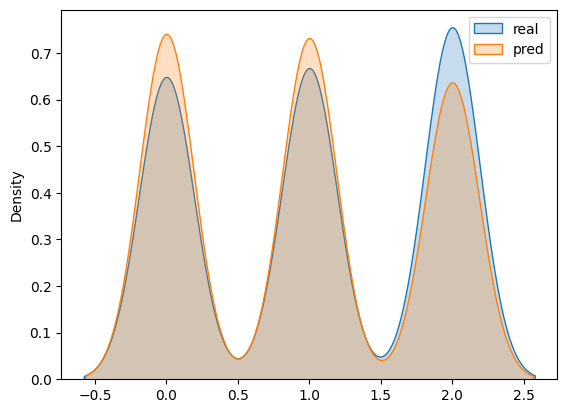

In [44]:
sns.kdeplot(LabelEncoder().fit_transform(y_test), fill=True, label='real')
sns.kdeplot(np.around(LabelEncoder().fit_transform(knn_cl.predict(X_test)), 0), fill=True, label='pred')
plt.legend()

**За графіком модель загалом поводиться близьео до реальних значень, недобір по чоловічій статі, з жіночою та інфантами навпаки**

**З підбором гіперпараметрів перформанс ідентичний, тому видалив, краще значення сусідів - 5 як і вказував**